# Metacritic Score Comparison Analysis

The goal of this project is to use the data scraped from Metacritic.com on all reviewed video games to compare critic ratings to user ratings. 

First we will import the data:

In [7]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
animation.rcParams['animation.ffmpeg_path'] = 'C:/Users/Kevin/ffmpeg/bin/ffmpeg.exe'

conn = pyodbc.connect('Driver={SQL Server};'
                              'Server=DESKTOP-OQUP3K1;'
                              'Database=metacritic;'
                              'Trusted_Connection=yes;')

sql = "SELECT GameName, game_props.Platform, ReleaseDate, CriticScore, UserScore * 10 As ScaledUserScore " \
          "FROM dbo.scoring " \
          "Inner Join dbo.game_props ON scoring.ScoringID = game_props.ScoringID " \
          "WHERE YEAR(ReleaseDate) > 1995 " \
          "ORDER BY ReleaseDate ASC"

df = pd.io.sql.read_sql(sql=sql, con=conn, parse_dates=["ReleaseDate"])

This dataset contains games from 1995 - 2019. 1995 was excluded because only one game is present in that year. For stylistic reasons on the visualization, it was left out. Therefore, the analysis will be done on games on metacritic from 1996 - 2019.

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
display(df, df.dtypes)

,GameName,Platform,ReleaseDate,CriticScore,ScaledUserScore
0,Duke Nukem 3D ...,PC,1996-01-29,89,87.0
1,Bad Mojo ...,PC,1996-02-29,74,69.0
2,Sid Meiers Civilization II ...,PC,1996-02-29,94,89.0
3,Resident Evil ...,PS,1996-03-30,91,90.0
4,Quake ...,PC,1996-06-22,94,88.0
5,Time Commando ...,PC,1996-07-31,80,83.0
6,Tekken 2 ...,PS,1996-08-25,89,86.0
7,Harvester ...,PC,1996-08-31,53,78.0
8,Super Mario 64 ...,N64,1996-09-26,94,92.0
9,Pilotwings 64 ...,N64,1996-09-29,80,81.0


GameName                   object
Platform                   object
ReleaseDate        datetime64[ns]
CriticScore                 int64
ScaledUserScore           float64
dtype: object

__________________________________________________________________________________
Now, lets do some data cleansing to remove rows we cannot compare (NaN) and convert floats to int:

In [3]:
df = df.dropna(how='any')
df['ScaledUserScore'] = df['ScaledUserScore'].astype('int64')

What I want to see is whether the average critic scores over a moving window is higher than the average user scores.

In [4]:
df['Diff'] = df['CriticScore'] - df['ScaledUserScore']
df

,GameName,Platform,ReleaseDate,CriticScore,ScaledUserScore,Diff
0,Duke Nukem 3D ...,PC,1996-01-29,89,87,2
1,Bad Mojo ...,PC,1996-02-29,74,69,5
2,Sid Meiers Civilization II ...,PC,1996-02-29,94,89,5
3,Resident Evil ...,PS,1996-03-30,91,90,1
4,Quake ...,PC,1996-06-22,94,88,6
5,Time Commando ...,PC,1996-07-31,80,83,-3
6,Tekken 2 ...,PS,1996-08-25,89,86,3
7,Harvester ...,PC,1996-08-31,53,78,-25
8,Super Mario 64 ...,N64,1996-09-26,94,92,2
9,Pilotwings 64 ...,N64,1996-09-29,80,81,-1


On games released in the same day, I will take the mean of the differences for those days. I will then construct a rolling window by averaging the past 150 games to generate the time-series.

In [5]:
dateDiff = df.groupby(['ReleaseDate']).mean()
Diff = dateDiff['Diff']

#modify rolling value to change window size
Diff = Diff.rolling(window=150).mean()
Diff = Diff.dropna(how='any')
Diff


ReleaseDate
2000-10-01   -1.072651
2000-10-03   -1.065984
2000-10-04   -1.105984
2000-10-06   -1.099317
2000-10-07   -1.185984
2000-10-09   -1.019317
2000-10-10   -1.055984
2000-10-13   -0.802651
2000-10-16   -0.887651
2000-10-18   -0.894317
                ...   
2019-04-16    6.549604
2019-04-17    6.545604
2019-04-18    6.536437
2019-04-22    6.558342
2019-04-23    6.835009
2019-04-25    6.923898
2019-04-26    6.889453
2019-04-30    6.962787
2019-05-02    6.952046
2019-05-12    6.962046
Name: Diff, Length: 3741, dtype: float64

Now lets create our visualization:

<IPython.core.display.Javascript object>


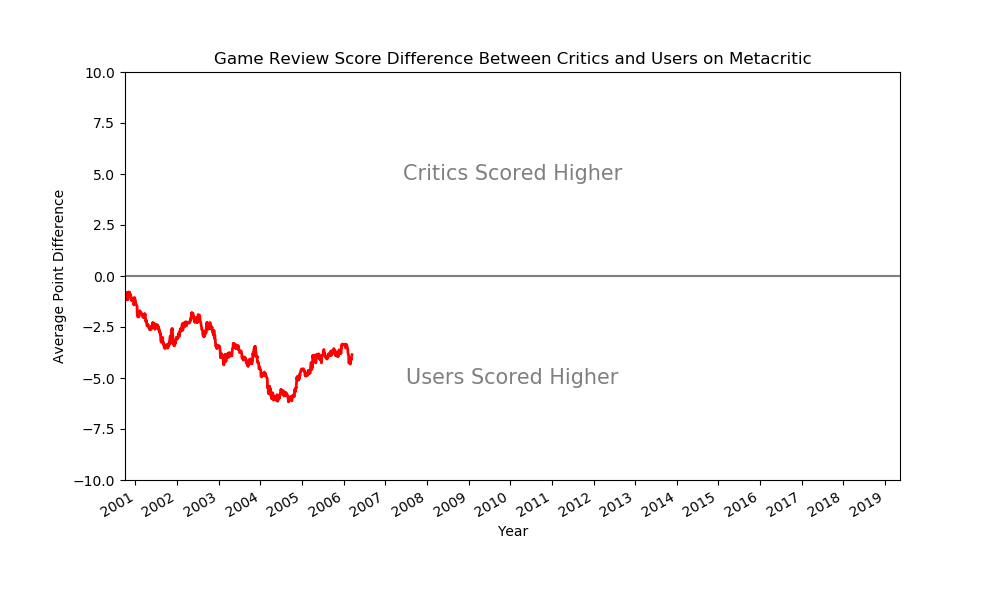

C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [6]:
# Initialize writers and allow animations to play
%matplotlib notebook
Writer = animation.writers['ffmpeg']
writer = Writer(fps=800, metadata=dict(artist='Kevin Sweet'))


#configure plot figure area
minDate = min(Diff.index)
maxDate = max(Diff.index)
fig, ax = plt.subplots(figsize=(10, 6))
fig.autofmt_xdate()
ax.set(xlim=(minDate, maxDate), ylim=(-10, 10), xlabel=('Year'), ylabel=('Average Point Difference'))
ax.set(title=('Game Review Score Difference Between Critics and Users on Metacritic'))

# adds date ticks for every year
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())

# horizontal axis line and text
plt.axhline(y=0, color='black').set_alpha(.5)

ax.text((730394.0+737191.0)/2, 5, r'Critics Scored Higher', fontsize=15, color='black', horizontalalignment='center',
       verticalalignment = 'center').set_alpha(.5)

ax.text((730394.0+737191.0)/2, -5, r'Users Scored Higher', fontsize=15, color='black', horizontalalignment='center',
       verticalalignment = 'center').set_alpha(.5)

#initialize timeseries line
line = ax.plot(Diff.index[0], Diff[0], color='red', lw=2)[0]

def animate(i):
    line.set_xdata(Diff.index[:i+1])
    line.set_ydata(Diff[:i+1])
anim = matplotlib.animation.FuncAnimation(fig, animate, interval=1, frames = len(Diff), repeat=True)

plt.show()
anim.save('MetacriticAnalysis.mp4', writer=writer)

This visualization shows that critics seem to be rating games higher than users on average after 2010, but is this statistically significant? To test this, I will use a paired z-test:

Ho:  µ1 - µ2 = 0
Ha:  µ1 - µ2 > 0
where:
      µ1 is the population mean for critic scores between 2010 - Present
      µ2 is the population mean for user scores between 2010 - Present


To be continued..